<a href="https://colab.research.google.com/github/ulisescerq/CURSO-FULL-STACK/blob/main/Aprendizaje_no_supervisado_PCA_Grupo%20Albahaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5to año - Ingeniería en Sistemas de Información

Inteligencia Artificial


UTN - Facultad Regional Villa María

#Aprendizaje No Supervisado y Análisis de Componentes Principales (PCA)

El aprendizaje no supervisado es una rama fundamental de la inteligencia artificial, donde los algoritmos exploran datos sin etiquetas predefinidas. A diferencia del aprendizaje supervisado, aquí buscamos patrones y estructuras ocultas.

# Análisis de componentes principales (PCA)

En la práctica, los features X de un dataset suelen tener un grado de relación entre sí (ej. pensar en features edad y altura para una muestra de datos de niños y adolescentes).
Como muchas veces, para estos datasets con datos correlacionados, es baja la cantidad de features que definen al dataset, debería ser posible encontrar la forma de explicar la mayor parte posible del dataset con la menor cantidad de features posible.
El **análisis de componentes principales (PCA)** realiza esto al calcular features transformados que surgen como combinación lineal de los demás, permitiendo así visualizar esta correlación y reducir la dimensión del dataset.
Al ser un algoritmo no supervisado el objetivo no es predecir una variable o resultado si no estudiar las variables que conforman nuestro conjunto de datos siendo su objetivo pasar de Xn variables a Xp variables siendo p<n para poder realizar representaciones en dos o tres dimensiones de un conjunto de datos multidimensional.

Veamos un ejemplo Práctico

In [ ]:
import numpy as np
import pandas as pd
#para gráficos vamos a importar seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

Para este Práctico seguiremos trabajando con el DataSet Iris que utilizamos en el práctico "Intro al aprendizaje supervisado I"

Descargar el dataset de  https://archive.ics.uci.edu/dataset/53/iris

In [ ]:
#para subir dataset local
#from google.colab import files
#uploaded = files.upload()

Este DataSet consiste en un conjunto de ejemplos que contiene tres flores de Iris: setosa, virginica y versicolor. Las mismas están distribuídas en 50 ejemplos de cada flor, y sus características indican el largo y ancho tanto de su sépalo como de su pétalo, y también se especifica de qué clase de Iris se trata (setosa, virgínica o versicolor).

In [ ]:
df = pd.read_csv('/content/iris.data', header=None)
print(df)
nombres_col = ['longitud_sepalo','ancho_sepalo','longitud_petalo','ancho_petalo','clase']
df.columns = nombres_col

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
X_cols=['longitud_sepalo','ancho_sepalo','longitud_petalo','ancho_petalo']

In [ ]:
df.head()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Estandarización y Optimización de los datos
Recurrimos a la biblioteca Scikit-Learn de Python, la misma que utilizamos cuando vimos el algoritmo KNN ya que  esta proporciona acceso a versiones de varios algoritmos comunes.
La estandarización es un proceso realizado en cada una de las variales las cuales se estandarizan con Media 0 y Desviación típica 1.
Una vez estandarizados los datos se realiza una búsqueda de loadings que maximice la varianza.
La varianza máxima se obtendrá si se trabaja con el conjunto completo de los datos.

Una vez obtenido el DataSet vamos a importar **PCA** (para el análisis de los componentes principales) y **StandardScaler** (para estandarizar nuestras columnas) de la librería sklearn.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
df[X_cols] = ss.fit_transform(df[X_cols])

en el paso anterior con fit_transform lo que se obtiene son las columnas entrenadas y transformadas.

In [ ]:
df.head()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


Podemos observar que el conjunto de datos a quedado normalizado

Con el conjunto normalizado procedemos a crear el PCA en este caso de dos componentes para realizar un análisis en dos dimensiones

In [ ]:
pca2 = PCA(n_components=2, random_state=42)

Entrenamos y transformamos nuestro conjunto de datos

In [ ]:
pca_2 =pca2.fit_transform (df[X_cols])

observamos los datos para ver nuestras dos componentes

In [ ]:
pca_2[:4]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771]])

Guardamos estas dos columnas en un DataFrame al que llamaremos df_2 indicandole que la primer componente almacenará todas las filas de la columna 0 y el componente 2 todas las filas de la columna 1 y la clase que hará referencias a la clase

In [ ]:
df_2= pd.DataFrame({'PCA1': pca_2[:,0], 'PCA2': pca_2[:,1],
                    'clase': df['clase']})

In [ ]:
df_2.head()

,PCA1,PCA2,clase
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


la varianza total explicada la brinda el atributo explained_variance_ratio_

In [ ]:
pca2.explained_variance_ratio_

array([0.72770452, 0.23030523])

La suma total de las varianzas de los componentes principales del conjunto entero es 1 en nuestro caso al trabajar solo con 2 componentes obtenemos un valor muy próximo a 1.


In [ ]:
pca2.explained_variance_ratio_.sum()

np.float64(0.9580097536148199)

A continuación veremos una gráfica de barra utilizando la biblioteca **seaborn** que importamos anteriormente
Indicando que los elementos de "x" corresponden al componente 1 y 2 de nuestro DataFrame y el elemento "y" tomará la varianza de cada componente

<Axes: >

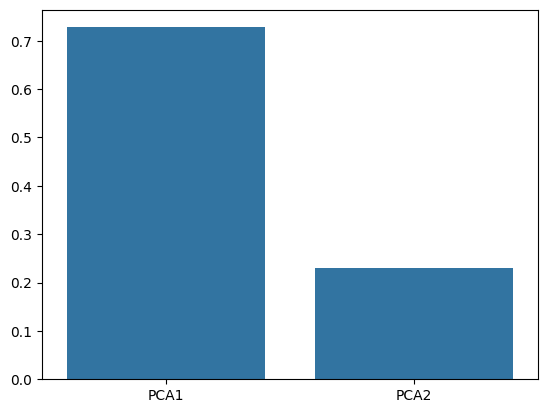

In [ ]:
#gráfico de barra
sns.barplot(x=['PCA1', 'PCA2'], y=pca2.explained_variance_ratio_)

A continuación haremos un scatterplot (diagrama de dispersión) a "x" le asignamos los valores de PCA1 y a "y" los de PCA2, que los respresente por clase dondole a cada clase un color, y le indicamos el DataFrame correspondiente en nuestro caso df_2

<Axes: xlabel='PCA1', ylabel='PCA2'>

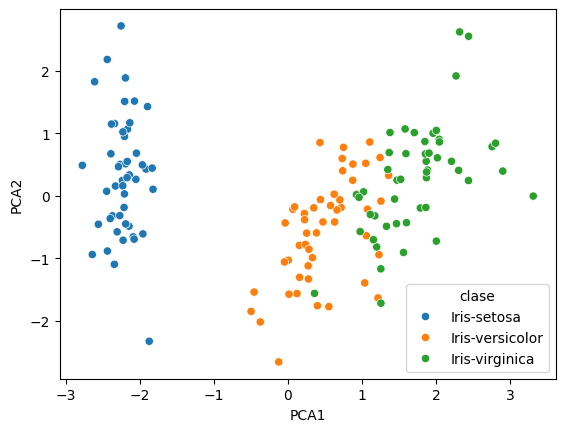

In [ ]:
sns.scatterplot(x='PCA1', y='PCA2', hue='clase', data=df_2)

# **Vamos a hacer lo mismo pero para 3 componentes**

In [ ]:
pca3 = PCA(n_components=3, random_state=42)

In [ ]:
pca_3 =pca3.fit_transform (df[X_cols])

In [ ]:
pca_3[:4]

array([[-2.26454173,  0.5057039 ,  0.12194335],
       [-2.0864255 , -0.65540473,  0.22725083],
       [-2.36795045, -0.31847731, -0.05147962],
       [-2.30419716, -0.57536771, -0.09886044]])

In [ ]:
df_3= pd.DataFrame({'PCA1': pca_3[:,0], 'PCA2': pca_3[:,1], 'PCA3': pca_3[:,2],
                    'clase': df['clase']})

In [ ]:
df_3.head()

,PCA1,PCA2,PCA3,clase
0,-2.264542,0.505704,0.121943,Iris-setosa
1,-2.086426,-0.655405,0.227251,Iris-setosa
2,-2.367950,-0.318477,-0.051480,Iris-setosa
3,-2.304197,-0.575368,-0.098860,Iris-setosa
4,-2.388777,0.674767,-0.021428,Iris-setosa


In [ ]:
pca3.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

Esto significa que:

Componente Principal	Varianza Explicada	% de Varianza
PC1 (Componente 1)	0.7277	72.77%
PC2 (Componente 2)	0.2303	23.03%
PC3 (Componente 3)	0.0368	3.68%

La primera componente principal (PC1) retiene aproximadamente el 72.77% de la varianza total del dataset original.

La segunda componente retiene un 23.03% adicional.

La tercera componente apenas explica un 3.68% del total.

In [ ]:
pca3.explained_variance_ratio_.sum()

np.float64(0.9948480731910938)

##Varianza acumulada
Para ver cuánta varianza se conserva al usar solo las primeras componentes:

In [ ]:
np.cumsum(pca3.explained_variance_ratio_)

array([0.72770452, 0.95800975, 0.99484807])

Esto indica que:

Usando solo 2 componentes (PC1 y PC2), se conserva aproximadamente el 95.8% de la información original, lo cual es excelente para reducción de dimensionalidad.
El 99.48% de la varianza total de los datos originales está conservada en los 3 componentes principales."

<Axes: >

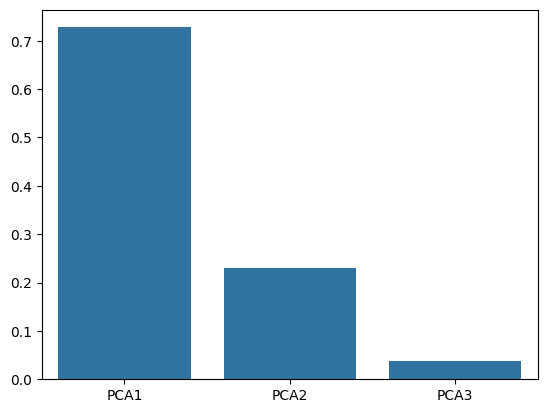

In [ ]:
#gráfico de barra
sns.barplot(x=['PCA1', 'PCA2', 'PCA3'], y=pca3.explained_variance_ratio_)

Vamos a hacer una figura de matplotlib

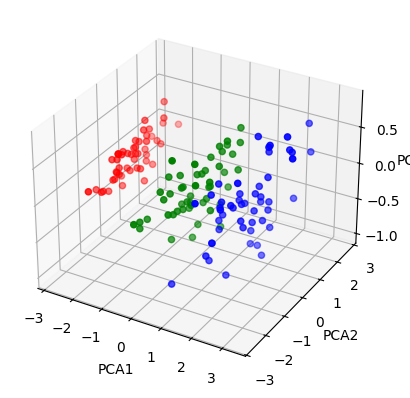

In [ ]:
fig =plt.figure()
ax =fig.add_subplot(111, projection='3d')
x=df_3['PCA1']
y=df_3['PCA2']
z=df_3['PCA3']

col= df_3['clase'].map(
{'Iris-setosa':'r',
'Iris-versicolor':'g',
'Iris-virginica':'b'}
)
ax.scatter(x,y,z, c=col, marker='o')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show(fig)

# Actividad
### Teniendo en cuenta las siguientes preguntas relacionadas al práctico elaborar un informe sobre el mismo.

¿Cuál es el propósito del análisis de componentes principales (PCA) en el contexto de este Colab y cómo contribuye a la comprensión del conjunto de datos Iris?

¿Cómo se realiza la estandarización de los datos en este Colab y por qué es importante para el análisis de PCA?

¿Por qué se eligen dos componentes principales en un principio y luego tres en el análisis de PCA?

¿Qué significa el atributo explained_variance_ratio_ en el contexto del análisis de PCA y cómo se interpreta su valor?

¿Qué conclusiones se pueden extraer al observar el gráfico de barras que muestra la varianza explicada por cada componente principal?

¿Cuál es el propósito del scatterplot (diagrama de dispersión) y qué información proporciona sobre el conjunto de datos Iris?

¿Qué diferencias se pueden observar entre el scatterplot de dos dimensiones y el scatterplot de tres dimensiones en términos de la representación de los datos de Iris?

¿Cómo podría afectar la elección de diferentes números de componentes principales en el análisis de PCA a la comprensión de los datos de Iris?

In [ ]:
import numpy as np
import pandas as pd
#para gráficos vamos a importar seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()


In [ ]:
df = pd.read_excel('/content/snic-provincias.xlsx', header=None, usecols=[1, 5, 6])

nombres_col_importantes = ['Provincia', 'cantidad Hechos', 'Cantidad- Victimas']
df.columns = nombres_col_importantes
print(df)
